epoch:0, train acc:0.146666666667, test acc:0.1207
epoch:1, train acc:0.16, test acc:0.1339
epoch:2, train acc:0.183333333333, test acc:0.1598
epoch:3, train acc:0.213333333333, test acc:0.1688
epoch:4, train acc:0.223333333333, test acc:0.187
epoch:5, train acc:0.226666666667, test acc:0.1982
epoch:6, train acc:0.253333333333, test acc:0.2124
epoch:7, train acc:0.256666666667, test acc:0.2211
epoch:8, train acc:0.273333333333, test acc:0.2388
epoch:9, train acc:0.273333333333, test acc:0.2443
epoch:10, train acc:0.32, test acc:0.2628
epoch:11, train acc:0.326666666667, test acc:0.2797
epoch:12, train acc:0.373333333333, test acc:0.3051
epoch:13, train acc:0.45, test acc:0.3442
epoch:14, train acc:0.476666666667, test acc:0.3794
epoch:15, train acc:0.513333333333, test acc:0.4092
epoch:16, train acc:0.546666666667, test acc:0.4163
epoch:17, train acc:0.53, test acc:0.4267
epoch:18, train acc:0.603333333333, test acc:0.4599
epoch:19, train acc:0.62, test acc:0.4757
epoch:20, train acc:0

epoch:167, train acc:0.913333333333, test acc:0.715
epoch:168, train acc:0.92, test acc:0.7272
epoch:169, train acc:0.926666666667, test acc:0.7252
epoch:170, train acc:0.926666666667, test acc:0.7179
epoch:171, train acc:0.933333333333, test acc:0.7171
epoch:172, train acc:0.933333333333, test acc:0.711
epoch:173, train acc:0.923333333333, test acc:0.7193
epoch:174, train acc:0.923333333333, test acc:0.7218
epoch:175, train acc:0.92, test acc:0.7208
epoch:176, train acc:0.926666666667, test acc:0.7238
epoch:177, train acc:0.92, test acc:0.7225
epoch:178, train acc:0.926666666667, test acc:0.7222
epoch:179, train acc:0.916666666667, test acc:0.7198
epoch:180, train acc:0.92, test acc:0.7253
epoch:181, train acc:0.926666666667, test acc:0.7212
epoch:182, train acc:0.926666666667, test acc:0.7262
epoch:183, train acc:0.92, test acc:0.7222
epoch:184, train acc:0.916666666667, test acc:0.7189
epoch:185, train acc:0.923333333333, test acc:0.7246
epoch:186, train acc:0.93, test acc:0.7209
ep

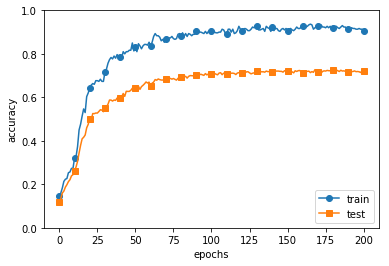

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()